In [1]:
# Importa as bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Lê os arquivos CSV
df_train = pd.read_csv('train.csv', sep=',', encoding='UTF8')
df_test = pd.read_csv('test.csv', sep=',', encoding='UTF8')
df_answer = pd.DataFrame()

In [3]:
df_test.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,43,RS,19,F,1,1,1,3,1,...,NaN,NaN,E,E,H,B,B,C,D,A
1,177f281c68fa032aedbd842a745da68490926cd2,15,PA,24,M,3,2,1,4,1,...,NaN,NaN,B,C,B,A,A,C,D,A
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,29,BA,16,F,2,1,3,0,1,...,NaN,NaN,E,F,G,B,B,A,NaN,D
3,5c356d810fa57671402502cd0933e5601a2ebf1e,41,PR,17,F,1,1,2,0,2,...,40.0,480.0,E,E,E,C,B,B,C,A
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,53,DF,19,F,1,1,1,1,1,...,80.0,720.0,E,E,E,B,B,B,D,A


In [4]:
df_test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA',
       'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [5]:
df_train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [6]:
# Verifica a correlação
corr = df_train.corr()['IN_TREINEIRO'].sort_values(ascending=False)[0:30]
print(corr)

IN_TREINEIRO               1.000000
TP_ST_CONCLUSAO            0.533983
TP_PRESENCA_CN             0.094692
TP_PRESENCA_CH             0.094692
TP_PRESENCA_LC             0.092454
TP_PRESENCA_MT             0.092454
Q034                       0.055265
Q039                       0.040348
Q005                       0.033411
Q038                       0.018855
TP_COR_RACA                0.009676
Unnamed: 0                 0.006717
TP_STATUS_REDACAO          0.006688
Q040                       0.005270
IN_SABATISTA               0.003824
IN_DEFICIENCIA_AUDITIVA    0.000873
Q032                      -0.000943
IN_DISLEXIA               -0.003297
IN_MEDIDOR_GLICOSE        -0.003297
IN_SALA_ESPECIAL          -0.003297
IN_DISCALCULIA            -0.003297
IN_MEDICAMENTOS           -0.003297
IN_IDOSO                  -0.004663
IN_DEFICIENCIA_MENTAL     -0.004663
IN_DEFICIT_ATENCAO        -0.004848
IN_LEITURA_LABIAL         -0.005711
IN_MESA_CADEIRA_RODAS     -0.006595
IN_SURDEZ                 -0

In [7]:
corr.index

Index(['IN_TREINEIRO', 'TP_ST_CONCLUSAO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
       'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'Q034', 'Q039', 'Q005', 'Q038',
       'TP_COR_RACA', 'Unnamed: 0', 'TP_STATUS_REDACAO', 'Q040',
       'IN_SABATISTA', 'IN_DEFICIENCIA_AUDITIVA', 'Q032', 'IN_DISLEXIA',
       'IN_MEDIDOR_GLICOSE', 'IN_SALA_ESPECIAL', 'IN_DISCALCULIA',
       'IN_MEDICAMENTOS', 'IN_IDOSO', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_LEITURA_LABIAL', 'IN_MESA_CADEIRA_RODAS',
       'IN_SURDEZ', 'IN_NOME_SOCIAL', 'IN_VISAO_MONOCULAR'],
      dtype='object')

In [8]:
# Define as features a serem usadas no modelo
features_train = ['IN_TREINEIRO', 'TP_ST_CONCLUSAO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
       'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
       'TP_COR_RACA', 'TP_STATUS_REDACAO',
       'IN_SABATISTA', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_IDOSO', 'IN_SURDEZ']

features_test = ['NU_INSCRICAO','TP_ST_CONCLUSAO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
       'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
       'TP_COR_RACA', 'TP_STATUS_REDACAO',
       'IN_SABATISTA', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_IDOSO', 'IN_SURDEZ']


In [9]:
# Verifica a existência de missings nas variáveis 
df_train[features_train].isna().sum()

IN_TREINEIRO            0
TP_ST_CONCLUSAO         0
TP_PRESENCA_CN          0
TP_PRESENCA_CH          0
TP_PRESENCA_LC          0
TP_PRESENCA_MT          0
TP_COR_RACA             0
TP_STATUS_REDACAO    3597
IN_SABATISTA            0
IN_DISLEXIA             0
IN_DISCALCULIA          0
IN_IDOSO                0
IN_SURDEZ               0
dtype: int64

In [10]:
#Substitui os dados faltantes no dataset de treino
df_train2 = df_train[features_train].fillna(0)
df_train2[features_train].isna().sum()

IN_TREINEIRO         0
TP_ST_CONCLUSAO      0
TP_PRESENCA_CN       0
TP_PRESENCA_CH       0
TP_PRESENCA_LC       0
TP_PRESENCA_MT       0
TP_COR_RACA          0
TP_STATUS_REDACAO    0
IN_SABATISTA         0
IN_DISLEXIA          0
IN_DISCALCULIA       0
IN_IDOSO             0
IN_SURDEZ            0
dtype: int64

In [11]:
#Verifica os missings nos dados de teste
df_test[features_test].isna().sum()

NU_INSCRICAO            0
TP_ST_CONCLUSAO         0
TP_PRESENCA_CN          0
TP_PRESENCA_CH          0
TP_PRESENCA_LC          0
TP_PRESENCA_MT          0
TP_COR_RACA             0
TP_STATUS_REDACAO    1170
IN_SABATISTA            0
IN_DISLEXIA             0
IN_DISCALCULIA          0
IN_IDOSO                0
IN_SURDEZ               0
dtype: int64

In [12]:
#Substitui os dados faltantes no dataset de treino
df_test2 = df_test[features_test].fillna(0)
df_test2[features_test].isna().sum() 

NU_INSCRICAO         0
TP_ST_CONCLUSAO      0
TP_PRESENCA_CN       0
TP_PRESENCA_CH       0
TP_PRESENCA_LC       0
TP_PRESENCA_MT       0
TP_COR_RACA          0
TP_STATUS_REDACAO    0
IN_SABATISTA         0
IN_DISLEXIA          0
IN_DISCALCULIA       0
IN_IDOSO             0
IN_SURDEZ            0
dtype: int64

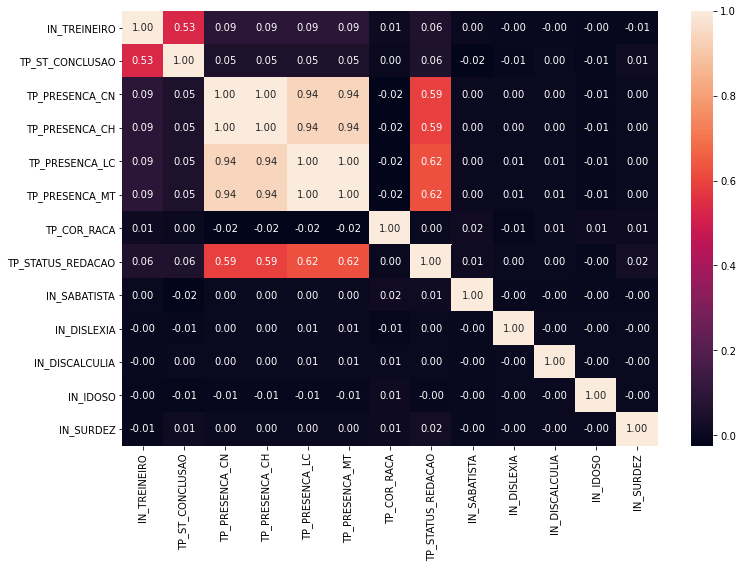

In [13]:
corr =  df_train2[features_train].corr()

%matplotlib inline
plt.figure(figsize=(12,8))
sns.heatmap(corr,  annot=True, fmt='.2f') #Gera um heatmap para facilitar a visualização da correlação
plt.xticks(rotation=90)
plt.show()

In [14]:
df_train2.head()

,IN_TREINEIRO,TP_ST_CONCLUSAO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,TP_COR_RACA,TP_STATUS_REDACAO,IN_SABATISTA,IN_DISLEXIA,IN_DISCALCULIA,IN_IDOSO,IN_SURDEZ
0,0,1,1,1,1,1,1,1.0,0,0,0,0,0
1,0,2,1,1,1,1,3,1.0,0,0,0,0,0
2,0,3,0,0,0,0,3,0.0,0,0,0,0,0
3,0,1,0,0,0,0,0,0.0,0,0,0,0,0
4,0,1,0,0,0,0,2,0.0,0,0,0,0,0


In [15]:
#Define as variáveis numéricas
variaveis_numericas = ['IN_TREINEIRO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
       'TP_STATUS_REDACAO', 'IN_SABATISTA', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_IDOSO', 'IN_SURDEZ']
variaveis_numericas_train = df_train2[variaveis_numericas]

In [16]:
variaveis_numericas = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
       'TP_STATUS_REDACAO', 'IN_SABATISTA', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_IDOSO', 'IN_SURDEZ']
variaveis_numericas_test = df_test2[variaveis_numericas]

In [17]:
#Define as variáveis categóricas
variaveis_categoricas = ['TP_ST_CONCLUSAO', 'TP_COR_RACA']

In [18]:
#Aplica o OheHotEncoder
ohe = OneHotEncoder(sparse=False)

ohe.fit(df_train2[variaveis_categoricas])

variaveis_categoricas_train = ohe.transform(df_train2[variaveis_categoricas])
variaveis_categoricas_test = ohe.transform(df_test2[variaveis_categoricas])

variaveis_categoricas_train = pd.DataFrame(variaveis_categoricas_train, columns=ohe.get_feature_names(variaveis_categoricas))
variaveis_categoricas_test = pd.DataFrame(variaveis_categoricas_test, columns=ohe.get_feature_names(variaveis_categoricas))

In [19]:
df_train3 = pd.concat([variaveis_numericas_train, variaveis_categoricas_train], axis=1)
df_test3 = pd.concat([variaveis_numericas_test, variaveis_categoricas_test, df_test2['NU_INSCRICAO']], axis=1)

In [20]:
#Verifica o balanceamento da classe
df_train3['IN_TREINEIRO'].value_counts(normalize=True)

0    0.870138
1    0.129862
Name: IN_TREINEIRO, dtype: float64

In [21]:
#Define a coluna 'NU_INSCRICAO' no dataset de resposta
df_answer['NU_INSCRICAO'] = df_test3['NU_INSCRICAO']
df_answer.head()

,NU_INSCRICAO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897
1,177f281c68fa032aedbd842a745da68490926cd2
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334
3,5c356d810fa57671402502cd0933e5601a2ebf1e
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3


In [22]:
#Determina a variável dependente e as explicativas
y_train = df_train3['IN_TREINEIRO']
df_train4 = df_train3.drop(columns='IN_TREINEIRO')
X_train = df_train4
df_test4 = df_test3.drop(columns='NU_INSCRICAO')
X_test = df_test4

In [23]:
#Aplica a função SMOTE
smote = SMOTE() #Faz o balanceamento dos dados através da tecnica de oversampling
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train)

In [24]:
#Verifica o balanceamento da classe
y_train_resampled.value_counts(normalize=True)

1    0.5
0    0.5
Name: IN_TREINEIRO, dtype: float64

In [25]:
#Aplica o classificador
rfc = RandomForestClassifier()
rfc.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [26]:
y_pred = rfc.predict(X_test)

In [27]:
df_answer['IN_TREINEIRO'] = pd.DataFrame(y_pred)

In [28]:
df_answer.head()

,NU_INSCRICAO,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,0
1,177f281c68fa032aedbd842a745da68490926cd2,0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1
3,5c356d810fa57671402502cd0933e5601a2ebf1e,0
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0


In [29]:
df_answer.to_csv('answer.csv', index=False, header=True)

In [30]:
df_answer['IN_TREINEIRO'].value_counts(normalize=True)

0    0.835449
1    0.164551
Name: IN_TREINEIRO, dtype: float64